 # Opis notatnika
 Zmierzamy do końca analizy danych, które zostały nam udostępnione. Ten krok dodaje jeszcze więcej informacji do naszego wyjściowego zbioru. Tym razem sprawdzimy między innymi to, czy opóźnienia lotów zależne są od trasy czy warunków pogodowych.

 Zanim jednak do tego przejdziemy, należy, podobnie jak w poprzednich krokach, skonfigurować odpowiednio notatnik.
 
 W tej części warsztatu ponownie wcielasz się w rolę Analiyka Danych, którego zadaniem jest wykonanie analizy eksplotacyjnej zbioru danych - jedno z wymagań dostarczonych przez klienta.

 Tutaj zaimportuj wymagane biblioteki

In [189]:
import urllib.parse
from sqlalchemy.engine import URL
from sqlalchemy import create_engine
from sqlalchemy import text
import pandas as pd
import matplotlib.pyplot as plt

 ## Połączenie z bazą danych
 Tutaj uzupełnij konfigurację połączenia

In [190]:
username = 'postgres'
password = 'SQLisFun'

host = 'localhost'
database = 'airlines'
port = None

 Tutaj stwórz zmienną engine, która zostanie użyta do połączenia z bazą danych

In [191]:
url= URL.create(
    "postgresql",
    username=username,
    password=password, 
    host=host,
    database=database,
)

engine = create_engine(url)

 Tutaj uzupełnij implementację metody `read_sql_table`

In [192]:
def read_sql_table(table_name):
    return pd.read_sql(table_name, con=engine)

 Tutaj zaczytaj zapisaną wcześniej ramkę danych `flight_df` do zmniennej o takiej samej nazwie

In [193]:
flight_df = pd.read_csv(
                    r'..\data\processed\flight_df_02.csv', 
                    sep=',',  
                    decimal='.' 
)

flight_df

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,is_delayed,is_weekend,distance_agg,manufacture_year,manufacture_year_agg
0,155238,1,29,2,MQ,N262NN,3566,10397,13930,1541,...,NaN,NaN,NaN,NaN,2019,False,False,"(600, 700]",2017.0,"(2014, 2017]"
1,155240,1,2,3,WN,N7710A,3709,10397,10721,1405,...,0.0,0.0,0.0,17.0,2019,True,False,"(900, 1000]",2005.0,"(2002, 2005]"
2,155241,1,2,3,WN,N767SW,4573,10397,10721,755,...,NaN,NaN,NaN,NaN,2019,False,False,"(900, 1000]",2000.0,"(1999, 2002]"
3,155242,1,2,3,WN,N203WN,5902,10397,10721,1745,...,0.0,0.0,0.0,12.0,2019,True,False,"(900, 1000]",2005.0,"(2002, 2005]"
4,155243,1,2,3,WN,N500WR,2499,10397,10821,1155,...,0.0,16.0,0.0,0.0,2019,False,False,"(500, 600]",2014.0,"(2011, 2014]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057386,1537328,12,11,3,DL,N321DH,1826,13303,10397,1807,...,NaN,NaN,NaN,NaN,2019,False,False,"(500, 600]",2017.0,"(2014, 2017]"
1057387,1537329,12,11,3,DL,N329NW,1982,13303,12953,1959,...,0.0,19.0,0.0,0.0,2019,True,False,"(1000, 1100]",1992.0,"(1990, 1993]"
1057388,1537330,12,11,3,DL,N331NW,1987,13303,10397,1125,...,NaN,NaN,NaN,NaN,2019,False,False,"(500, 600]",1992.0,"(1990, 1993]"
1057389,1537331,12,11,3,DL,N309DN,2151,13303,12953,700,...,0.0,66.0,0.0,0.0,2019,True,False,"(1000, 1100]",2016.0,"(2014, 2017]"


 # Wzbogacenie o `airport_list`
 Wczytaj do obszaru roboczego tabelę `airport_list` używając procedury `read_sql_table`. Wykonaj poniższe ćwiczenia:  
 1. Sprawdź, czy klucz `origin_airport_id` jest unikalny, tj. nie ma dwóch takich samych wartości w kolumnie `origin_airport_id`.  
 1. Jeżeli duplikaty występują, usuń je w najdogodniejszy dla Ciebie sposób.  
 1. Jeśli duplikaty nie występują, złącz ramki `airport_list_df` wraz z aktualną `flight_df`, używając kolumny `origin_airport_id` oraz złączenia typu `LEFT JOIN`. Z ramki `airport_list_df` interesuje nas dodanie kolumny `origin_city_name`.  
 1. Dodatkowo dokonaj jeszcze raz złączenia ramki `flight_df` z `airport_list_df`, tym razem jednak złącz kolumnę `destination_airport_id` wraz z `origin_airport_id`. Podobnie jak wcześniej, interesuje nas kolumna `origin_city_name`, jedank ona powinna zostać wyświetlona jako `destination_city_name`

 Tutaj wczytaj ramkę `airport_list_df`

In [194]:
airport_list_df = read_sql_table('airport_list')
airport_list_df 

,id,origin_airport_id,display_airport_name,origin_city_name,name
0,292,11638,Fresno Air Terminal,"Fresno, CA","FRESNO YOSEMITE INTERNATIONAL, CA US"
1,293,13342,General Mitchell Field,"Milwaukee, WI","MILWAUKEE MITCHELL AIRPORT, WI US"
2,294,13244,Memphis International,"Memphis, TN","MEMPHIS INTERNATIONAL AIRPORT, TN US"
3,295,15096,Syracuse Hancock International,"Syracuse, NY","SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US"
4,296,10397,Atlanta Municipal,"Atlanta, GA",ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...
...,...,...,...,...,...
92,384,13198,Kansas City International,"Kansas City, MO","KANSAS CITY INTERNATIONAL AIRPORT, MO US"
93,385,10423,Austin - Bergstrom International,"Austin, TX","AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US"
94,386,15370,Tulsa International,"Tulsa, OK","OKLAHOMA CITY WILL ROGERS WORLD AIRPORT, OK US"
95,387,13303,Miami International,"Miami, FL","MIAMI INTERNATIONAL AIRPORT, FL US"


 Tutaj sprawdż, czy występują duplikaty dla kolumny `origin_airport_id`

In [195]:
origin_airport_id_duplicated = airport_list_df['origin_airport_id'].duplicated().to_frame()
duplicates = origin_airport_id_duplicated.loc[origin_airport_id_duplicated['origin_airport_id'] == True]
duplicates

,origin_airport_id


 Tutaj usuń duplikaty – jeśli występują

In [196]:
# there is no duplicates in column 'origin_airport_id'

 Tutaj dokonaj złączenia ramki `flight_df` oraz `airport_list_df` używając `origin_airport_id`

In [197]:
flight_df = pd.merge(
    left = flight_df,
    right = airport_list_df[['origin_airport_id', 'origin_city_name']],
    how = 'left',
    left_on = ['origin_airport_id'],
    right_on = ['origin_airport_id']
)

flight_df

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,nas_delay,security_delay,late_aircraft_delay,year,is_delayed,is_weekend,distance_agg,manufacture_year,manufacture_year_agg,origin_city_name
0,155238,1,29,2,MQ,N262NN,3566,10397,13930,1541,...,NaN,NaN,NaN,2019,False,False,"(600, 700]",2017.0,"(2014, 2017]","Atlanta, GA"
1,155240,1,2,3,WN,N7710A,3709,10397,10721,1405,...,0.0,0.0,17.0,2019,True,False,"(900, 1000]",2005.0,"(2002, 2005]","Atlanta, GA"
2,155241,1,2,3,WN,N767SW,4573,10397,10721,755,...,NaN,NaN,NaN,2019,False,False,"(900, 1000]",2000.0,"(1999, 2002]","Atlanta, GA"
3,155242,1,2,3,WN,N203WN,5902,10397,10721,1745,...,0.0,0.0,12.0,2019,True,False,"(900, 1000]",2005.0,"(2002, 2005]","Atlanta, GA"
4,155243,1,2,3,WN,N500WR,2499,10397,10821,1155,...,16.0,0.0,0.0,2019,False,False,"(500, 600]",2014.0,"(2011, 2014]","Atlanta, GA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057386,1537328,12,11,3,DL,N321DH,1826,13303,10397,1807,...,NaN,NaN,NaN,2019,False,False,"(500, 600]",2017.0,"(2014, 2017]","Miami, FL"
1057387,1537329,12,11,3,DL,N329NW,1982,13303,12953,1959,...,19.0,0.0,0.0,2019,True,False,"(1000, 1100]",1992.0,"(1990, 1993]","Miami, FL"
1057388,1537330,12,11,3,DL,N331NW,1987,13303,10397,1125,...,NaN,NaN,NaN,2019,False,False,"(500, 600]",1992.0,"(1990, 1993]","Miami, FL"
1057389,1537331,12,11,3,DL,N309DN,2151,13303,12953,700,...,66.0,0.0,0.0,2019,True,False,"(1000, 1100]",2016.0,"(2014, 2017]","Miami, FL"


 Tutaj dokonaj złączenia ramki `flight_df` oraz `airport_list_df` używając `destination_airport_id`

In [198]:
flight_df = pd.merge(
    left = flight_df,
    right = airport_list_df[['origin_airport_id', 'origin_city_name']],
    how = 'left',
    left_on = ['dest_airport_id'],
    right_on = ['origin_airport_id']
)

flight_df

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id_x,dest_airport_id,crs_dep_time,...,late_aircraft_delay,year,is_delayed,is_weekend,distance_agg,manufacture_year,manufacture_year_agg,origin_city_name_x,origin_airport_id_y,origin_city_name_y
0,155238,1,29,2,MQ,N262NN,3566,10397,13930,1541,...,NaN,2019,False,False,"(600, 700]",2017.0,"(2014, 2017]","Atlanta, GA",13930.0,"Chicago, IL"
1,155240,1,2,3,WN,N7710A,3709,10397,10721,1405,...,17.0,2019,True,False,"(900, 1000]",2005.0,"(2002, 2005]","Atlanta, GA",10721.0,"Boston, MA"
2,155241,1,2,3,WN,N767SW,4573,10397,10721,755,...,NaN,2019,False,False,"(900, 1000]",2000.0,"(1999, 2002]","Atlanta, GA",10721.0,"Boston, MA"
3,155242,1,2,3,WN,N203WN,5902,10397,10721,1745,...,12.0,2019,True,False,"(900, 1000]",2005.0,"(2002, 2005]","Atlanta, GA",10721.0,"Boston, MA"
4,155243,1,2,3,WN,N500WR,2499,10397,10821,1155,...,0.0,2019,False,False,"(500, 600]",2014.0,"(2011, 2014]","Atlanta, GA",10821.0,"Baltimore, MD"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057386,1537328,12,11,3,DL,N321DH,1826,13303,10397,1807,...,NaN,2019,False,False,"(500, 600]",2017.0,"(2014, 2017]","Miami, FL",10397.0,"Atlanta, GA"
1057387,1537329,12,11,3,DL,N329NW,1982,13303,12953,1959,...,0.0,2019,True,False,"(1000, 1100]",1992.0,"(1990, 1993]","Miami, FL",12953.0,"New York, NY"
1057388,1537330,12,11,3,DL,N331NW,1987,13303,10397,1125,...,NaN,2019,False,False,"(500, 600]",1992.0,"(1990, 1993]","Miami, FL",10397.0,"Atlanta, GA"
1057389,1537331,12,11,3,DL,N309DN,2151,13303,12953,700,...,0.0,2019,True,False,"(1000, 1100]",2016.0,"(2014, 2017]","Miami, FL",12953.0,"New York, NY"


In [199]:
flight_df = flight_df.rename(columns = {
    'origin_city_name_x' : 'origin_city_name',
    'origin_city_name_y' : 'destination_city_name',
    'origin_airport_id_x' : 'origin_airport_id'
})

flight_df

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,late_aircraft_delay,year,is_delayed,is_weekend,distance_agg,manufacture_year,manufacture_year_agg,origin_city_name,origin_airport_id_y,destination_city_name
0,155238,1,29,2,MQ,N262NN,3566,10397,13930,1541,...,NaN,2019,False,False,"(600, 700]",2017.0,"(2014, 2017]","Atlanta, GA",13930.0,"Chicago, IL"
1,155240,1,2,3,WN,N7710A,3709,10397,10721,1405,...,17.0,2019,True,False,"(900, 1000]",2005.0,"(2002, 2005]","Atlanta, GA",10721.0,"Boston, MA"
2,155241,1,2,3,WN,N767SW,4573,10397,10721,755,...,NaN,2019,False,False,"(900, 1000]",2000.0,"(1999, 2002]","Atlanta, GA",10721.0,"Boston, MA"
3,155242,1,2,3,WN,N203WN,5902,10397,10721,1745,...,12.0,2019,True,False,"(900, 1000]",2005.0,"(2002, 2005]","Atlanta, GA",10721.0,"Boston, MA"
4,155243,1,2,3,WN,N500WR,2499,10397,10821,1155,...,0.0,2019,False,False,"(500, 600]",2014.0,"(2011, 2014]","Atlanta, GA",10821.0,"Baltimore, MD"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057386,1537328,12,11,3,DL,N321DH,1826,13303,10397,1807,...,NaN,2019,False,False,"(500, 600]",2017.0,"(2014, 2017]","Miami, FL",10397.0,"Atlanta, GA"
1057387,1537329,12,11,3,DL,N329NW,1982,13303,12953,1959,...,0.0,2019,True,False,"(1000, 1100]",1992.0,"(1990, 1993]","Miami, FL",12953.0,"New York, NY"
1057388,1537330,12,11,3,DL,N331NW,1987,13303,10397,1125,...,NaN,2019,False,False,"(500, 600]",1992.0,"(1990, 1993]","Miami, FL",10397.0,"Atlanta, GA"
1057389,1537331,12,11,3,DL,N309DN,2151,13303,12953,700,...,0.0,2019,True,False,"(1000, 1100]",2016.0,"(2014, 2017]","Miami, FL",12953.0,"New York, NY"


In [200]:
flight_df = flight_df.drop('origin_airport_id_y', axis=1)
flight_df

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,security_delay,late_aircraft_delay,year,is_delayed,is_weekend,distance_agg,manufacture_year,manufacture_year_agg,origin_city_name,destination_city_name
0,155238,1,29,2,MQ,N262NN,3566,10397,13930,1541,...,NaN,NaN,2019,False,False,"(600, 700]",2017.0,"(2014, 2017]","Atlanta, GA","Chicago, IL"
1,155240,1,2,3,WN,N7710A,3709,10397,10721,1405,...,0.0,17.0,2019,True,False,"(900, 1000]",2005.0,"(2002, 2005]","Atlanta, GA","Boston, MA"
2,155241,1,2,3,WN,N767SW,4573,10397,10721,755,...,NaN,NaN,2019,False,False,"(900, 1000]",2000.0,"(1999, 2002]","Atlanta, GA","Boston, MA"
3,155242,1,2,3,WN,N203WN,5902,10397,10721,1745,...,0.0,12.0,2019,True,False,"(900, 1000]",2005.0,"(2002, 2005]","Atlanta, GA","Boston, MA"
4,155243,1,2,3,WN,N500WR,2499,10397,10821,1155,...,0.0,0.0,2019,False,False,"(500, 600]",2014.0,"(2011, 2014]","Atlanta, GA","Baltimore, MD"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057386,1537328,12,11,3,DL,N321DH,1826,13303,10397,1807,...,NaN,NaN,2019,False,False,"(500, 600]",2017.0,"(2014, 2017]","Miami, FL","Atlanta, GA"
1057387,1537329,12,11,3,DL,N329NW,1982,13303,12953,1959,...,0.0,0.0,2019,True,False,"(1000, 1100]",1992.0,"(1990, 1993]","Miami, FL","New York, NY"
1057388,1537330,12,11,3,DL,N331NW,1987,13303,10397,1125,...,NaN,NaN,2019,False,False,"(500, 600]",1992.0,"(1990, 1993]","Miami, FL","Atlanta, GA"
1057389,1537331,12,11,3,DL,N309DN,2151,13303,12953,700,...,0.0,0.0,2019,True,False,"(1000, 1100]",2016.0,"(2014, 2017]","Miami, FL","New York, NY"


### Sprawdzenie
Uruchom kod poniżej, aby sprawdzić, czy ta część została poprawnie wykonana

In [201]:
assert 'origin_city_name' in flight_df.columns, 'Brak kolumny `origin_city_name` w ramce flight_df'
assert 'destination_city_name' in flight_df.columns, 'Brak kolumny `destination_city_name` w ramce flight_df'

flight_df_expected_rows_amount = 1057391
assert flight_df.shape[0] == flight_df_expected_rows_amount, 'Ups, zmieniła się liczba wierszy...'

 ## Analiza według lotnisk oraz tras
 Wykonaj poniższe polecenia:  
 1. Wyznacz lotniska, z których **odlatywało** najwięcej samolotów. Wynik zapisz do ramki `top_airports_origin_df`.
 1. Wyznacz lotnika, na których najwięcej lotów **się kończyło**. Wynik zapisz do ramki `top_airports_destination_df`.  
 1. Wyznacz najczęściej uczęszczaną trasę, wynik zapisz do ramki `top_route_df`.  
 1. Przy założeniu, że reprezentatywna liczba lotów na trasie wynosi ponad 500, wyznacz dodatkowo top 10:  
     - tras z **najmniejszym odsetkiem opóźnień**, wynik zapisz do ramki `least_route_delays_df`.  
     - tras z **największym odsetkiem opóźnień**, wynik zapisz do ramki `top_route_delays_df`.

 Tutaj wyznacz ramkę `top_airports_origin_df`

In [202]:
top_airports_origin_df  = flight_df.groupby('origin_city_name')['id'].count().to_frame().reset_index().sort_values(by = 'id', ascending = False)
top_airports_origin_df 

,origin_city_name,id
1,"Atlanta, GA",123162
6,"Chicago, IL",105437
19,"Los Angeles, CA",87849
23,"New York, NY",75785
10,"Denver, CO",64525
3,"Boston, MA",55989
34,"Seattle, WA",50465
32,"San Francisco, CA",50124
9,"Dallas/Fort Worth, TX",39511
17,"Las Vegas, NV",38456


 Tutaj wyznacz ramkę `top_airports_destination_df`

In [203]:
top_airports_destination_df = flight_df.groupby('destination_city_name')['id'].count().to_frame().reset_index().sort_values(by = 'id', ascending = False)
top_airports_destination_df

,destination_city_name,id
1,"Atlanta, GA",122945
6,"Chicago, IL",100333
19,"Los Angeles, CA",87776
24,"New York, NY",75769
10,"Denver, CO",64602
3,"Boston, MA",56057
36,"Seattle, WA",50230
33,"San Francisco, CA",49999
9,"Dallas/Fort Worth, TX",39488
17,"Las Vegas, NV",38494


In [204]:
flight_df['route'] = flight_df['origin_city_name'] + ' -> ' + flight_df['destination_city_name']
flight_df

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,late_aircraft_delay,year,is_delayed,is_weekend,distance_agg,manufacture_year,manufacture_year_agg,origin_city_name,destination_city_name,route
0,155238,1,29,2,MQ,N262NN,3566,10397,13930,1541,...,NaN,2019,False,False,"(600, 700]",2017.0,"(2014, 2017]","Atlanta, GA","Chicago, IL","Atlanta, GA -> Chicago, IL"
1,155240,1,2,3,WN,N7710A,3709,10397,10721,1405,...,17.0,2019,True,False,"(900, 1000]",2005.0,"(2002, 2005]","Atlanta, GA","Boston, MA","Atlanta, GA -> Boston, MA"
2,155241,1,2,3,WN,N767SW,4573,10397,10721,755,...,NaN,2019,False,False,"(900, 1000]",2000.0,"(1999, 2002]","Atlanta, GA","Boston, MA","Atlanta, GA -> Boston, MA"
3,155242,1,2,3,WN,N203WN,5902,10397,10721,1745,...,12.0,2019,True,False,"(900, 1000]",2005.0,"(2002, 2005]","Atlanta, GA","Boston, MA","Atlanta, GA -> Boston, MA"
4,155243,1,2,3,WN,N500WR,2499,10397,10821,1155,...,0.0,2019,False,False,"(500, 600]",2014.0,"(2011, 2014]","Atlanta, GA","Baltimore, MD","Atlanta, GA -> Baltimore, MD"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057386,1537328,12,11,3,DL,N321DH,1826,13303,10397,1807,...,NaN,2019,False,False,"(500, 600]",2017.0,"(2014, 2017]","Miami, FL","Atlanta, GA","Miami, FL -> Atlanta, GA"
1057387,1537329,12,11,3,DL,N329NW,1982,13303,12953,1959,...,0.0,2019,True,False,"(1000, 1100]",1992.0,"(1990, 1993]","Miami, FL","New York, NY","Miami, FL -> New York, NY"
1057388,1537330,12,11,3,DL,N331NW,1987,13303,10397,1125,...,NaN,2019,False,False,"(500, 600]",1992.0,"(1990, 1993]","Miami, FL","Atlanta, GA","Miami, FL -> Atlanta, GA"
1057389,1537331,12,11,3,DL,N309DN,2151,13303,12953,700,...,0.0,2019,True,False,"(1000, 1100]",2016.0,"(2014, 2017]","Miami, FL","New York, NY","Miami, FL -> New York, NY"


In [205]:
flight_df_no_null = flight_df.loc[
   (flight_df['origin_city_name'].notnull()) &
   (flight_df['destination_city_name'].notnull())
    ]
flight_df_no_null

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,late_aircraft_delay,year,is_delayed,is_weekend,distance_agg,manufacture_year,manufacture_year_agg,origin_city_name,destination_city_name,route
0,155238,1,29,2,MQ,N262NN,3566,10397,13930,1541,...,NaN,2019,False,False,"(600, 700]",2017.0,"(2014, 2017]","Atlanta, GA","Chicago, IL","Atlanta, GA -> Chicago, IL"
1,155240,1,2,3,WN,N7710A,3709,10397,10721,1405,...,17.0,2019,True,False,"(900, 1000]",2005.0,"(2002, 2005]","Atlanta, GA","Boston, MA","Atlanta, GA -> Boston, MA"
2,155241,1,2,3,WN,N767SW,4573,10397,10721,755,...,NaN,2019,False,False,"(900, 1000]",2000.0,"(1999, 2002]","Atlanta, GA","Boston, MA","Atlanta, GA -> Boston, MA"
3,155242,1,2,3,WN,N203WN,5902,10397,10721,1745,...,12.0,2019,True,False,"(900, 1000]",2005.0,"(2002, 2005]","Atlanta, GA","Boston, MA","Atlanta, GA -> Boston, MA"
4,155243,1,2,3,WN,N500WR,2499,10397,10821,1155,...,0.0,2019,False,False,"(500, 600]",2014.0,"(2011, 2014]","Atlanta, GA","Baltimore, MD","Atlanta, GA -> Baltimore, MD"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057386,1537328,12,11,3,DL,N321DH,1826,13303,10397,1807,...,NaN,2019,False,False,"(500, 600]",2017.0,"(2014, 2017]","Miami, FL","Atlanta, GA","Miami, FL -> Atlanta, GA"
1057387,1537329,12,11,3,DL,N329NW,1982,13303,12953,1959,...,0.0,2019,True,False,"(1000, 1100]",1992.0,"(1990, 1993]","Miami, FL","New York, NY","Miami, FL -> New York, NY"
1057388,1537330,12,11,3,DL,N331NW,1987,13303,10397,1125,...,NaN,2019,False,False,"(500, 600]",1992.0,"(1990, 1993]","Miami, FL","Atlanta, GA","Miami, FL -> Atlanta, GA"
1057389,1537331,12,11,3,DL,N309DN,2151,13303,12953,700,...,0.0,2019,True,False,"(1000, 1100]",2016.0,"(2014, 2017]","Miami, FL","New York, NY","Miami, FL -> New York, NY"


In [206]:
flight_df_no_null['route'] = flight_df_no_null['origin_city_name'] + ' -> ' + flight_df_no_null['destination_city_name']
flight_df_no_null

C:\Users\urszu\AppData\Local\Temp\ipykernel_19148\2432410496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_df_no_null['route'] = flight_df_no_null['origin_city_name'] + ' -> ' + flight_df_no_null['destination_city_name']


,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,late_aircraft_delay,year,is_delayed,is_weekend,distance_agg,manufacture_year,manufacture_year_agg,origin_city_name,destination_city_name,route
0,155238,1,29,2,MQ,N262NN,3566,10397,13930,1541,...,NaN,2019,False,False,"(600, 700]",2017.0,"(2014, 2017]","Atlanta, GA","Chicago, IL","Atlanta, GA -> Chicago, IL"
1,155240,1,2,3,WN,N7710A,3709,10397,10721,1405,...,17.0,2019,True,False,"(900, 1000]",2005.0,"(2002, 2005]","Atlanta, GA","Boston, MA","Atlanta, GA -> Boston, MA"
2,155241,1,2,3,WN,N767SW,4573,10397,10721,755,...,NaN,2019,False,False,"(900, 1000]",2000.0,"(1999, 2002]","Atlanta, GA","Boston, MA","Atlanta, GA -> Boston, MA"
3,155242,1,2,3,WN,N203WN,5902,10397,10721,1745,...,12.0,2019,True,False,"(900, 1000]",2005.0,"(2002, 2005]","Atlanta, GA","Boston, MA","Atlanta, GA -> Boston, MA"
4,155243,1,2,3,WN,N500WR,2499,10397,10821,1155,...,0.0,2019,False,False,"(500, 600]",2014.0,"(2011, 2014]","Atlanta, GA","Baltimore, MD","Atlanta, GA -> Baltimore, MD"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057386,1537328,12,11,3,DL,N321DH,1826,13303,10397,1807,...,NaN,2019,False,False,"(500, 600]",2017.0,"(2014, 2017]","Miami, FL","Atlanta, GA","Miami, FL -> Atlanta, GA"
1057387,1537329,12,11,3,DL,N329NW,1982,13303,12953,1959,...,0.0,2019,True,False,"(1000, 1100]",1992.0,"(1990, 1993]","Miami, FL","New York, NY","Miami, FL -> New York, NY"
1057388,1537330,12,11,3,DL,N331NW,1987,13303,10397,1125,...,NaN,2019,False,False,"(500, 600]",1992.0,"(1990, 1993]","Miami, FL","Atlanta, GA","Miami, FL -> Atlanta, GA"
1057389,1537331,12,11,3,DL,N309DN,2151,13303,12953,700,...,0.0,2019,True,False,"(1000, 1100]",2016.0,"(2014, 2017]","Miami, FL","New York, NY","Miami, FL -> New York, NY"


In [207]:
top_route_df = flight_df_no_null.groupby('route')['id'].count().to_frame().reset_index().sort_values(by = 'id', ascending = False)
top_route_df

,route,id
95,"New York, NY -> Boston, MA",15256
24,"Boston, MA -> New York, NY",15149
42,"Chicago, IL -> New York, NY",14219
97,"New York, NY -> Chicago, IL",14203
87,"Los Angeles, CA -> San Francisco, CA",14096
...,...,...
119,"Raleigh/Durham, NC -> Atlanta, GA",5275
8,"Atlanta, GA -> Honolulu, HI",5273
113,"Phoenix, AZ -> Chicago, IL",5270
109,"Orlando, FL -> San Juan, PR",5206


In [208]:
top_route_df = top_route_df.loc[top_route_df['id'] > 500]
top_route_df

,route,id
95,"New York, NY -> Boston, MA",15256
24,"Boston, MA -> New York, NY",15149
42,"Chicago, IL -> New York, NY",14219
97,"New York, NY -> Chicago, IL",14203
87,"Los Angeles, CA -> San Francisco, CA",14096
...,...,...
119,"Raleigh/Durham, NC -> Atlanta, GA",5275
8,"Atlanta, GA -> Honolulu, HI",5273
113,"Phoenix, AZ -> Chicago, IL",5270
109,"Orlando, FL -> San Juan, PR",5206


In [209]:
flight_delayed_df = flight_df_no_null.loc[
    (flight_df_no_null['is_delayed'] == True) &
    (flight_df_no_null['route'].isin(top_route_df['route']))
     ]
flight_delayed_df

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,late_aircraft_delay,year,is_delayed,is_weekend,distance_agg,manufacture_year,manufacture_year_agg,origin_city_name,destination_city_name,route
1,155240,1,2,3,WN,N7710A,3709,10397,10721,1405,...,17.0,2019,True,False,"(900, 1000]",2005.0,"(2002, 2005]","Atlanta, GA","Boston, MA","Atlanta, GA -> Boston, MA"
3,155242,1,2,3,WN,N203WN,5902,10397,10721,1745,...,12.0,2019,True,False,"(900, 1000]",2005.0,"(2002, 2005]","Atlanta, GA","Boston, MA","Atlanta, GA -> Boston, MA"
6,155245,1,2,3,WN,N294WN,3801,10397,10821,2015,...,12.0,2019,True,False,"(500, 600]",2007.0,"(2005, 2008]","Atlanta, GA","Baltimore, MD","Atlanta, GA -> Baltimore, MD"
8,155247,1,2,3,WN,N7718B,4771,10397,10821,945,...,NaN,2019,True,False,"(500, 600]",2005.0,"(2002, 2005]","Atlanta, GA","Baltimore, MD","Atlanta, GA -> Baltimore, MD"
14,155253,1,2,3,WN,N740SW,6626,10397,11278,2200,...,40.0,2019,True,False,"(500, 600]",1998.0,"(1996, 1999]","Atlanta, GA","Washington, DC","Atlanta, GA -> Washington, DC"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057380,1537322,12,11,3,DL,N343DN,1455,13303,12953,1458,...,0.0,2019,True,False,"(1000, 1100]",2018.0,"(2017, 2020]","Miami, FL","New York, NY","Miami, FL -> New York, NY"
1057382,1537324,12,11,3,DL,N327DN,1469,13303,12953,1702,...,21.0,2019,True,False,"(1000, 1100]",2017.0,"(2014, 2017]","Miami, FL","New York, NY","Miami, FL -> New York, NY"
1057385,1537327,12,11,3,DL,N363DN,1795,13303,10397,1500,...,29.0,2019,True,False,"(500, 600]",2018.0,"(2017, 2020]","Miami, FL","Atlanta, GA","Miami, FL -> Atlanta, GA"
1057387,1537329,12,11,3,DL,N329NW,1982,13303,12953,1959,...,0.0,2019,True,False,"(1000, 1100]",1992.0,"(1990, 1993]","Miami, FL","New York, NY","Miami, FL -> New York, NY"


In [210]:
route_delays_df = (flight_delayed_df.groupby('route')['is_delayed'].count() / flight_df_no_null.groupby('route')['is_delayed'].count()).to_frame().reset_index().sort_values(by = 'is_delayed', ascending = False)
route_delays_df

,route,is_delayed
107,"Orlando, FL -> Newark, NJ",0.335248
64,"Denver, CO -> San Francisco, CA",0.320471
13,"Atlanta, GA -> Newark, NJ",0.311941
103,"Newark, NJ -> Boston, MA",0.293400
43,"Chicago, IL -> Newark, NJ",0.287817
...,...,...
29,"Burbank, CA -> Kona, HI",0.057670
28,"Burbank, CA -> Kahului, HI",0.054452
78,"Lihue, HI -> Burbank, CA",0.054089
72,"Kona, HI -> Burbank, CA",0.053388


In [211]:
top_route_delays_df =  route_delays_df.nlargest(10, 'is_delayed')
top_route_delays_df

,route,is_delayed
107,"Orlando, FL -> Newark, NJ",0.335248
64,"Denver, CO -> San Francisco, CA",0.320471
13,"Atlanta, GA -> Newark, NJ",0.311941
103,"Newark, NJ -> Boston, MA",0.293400
43,"Chicago, IL -> Newark, NJ",0.287817
45,"Chicago, IL -> San Francisco, CA",0.286925
25,"Boston, MA -> Newark, NJ",0.286686
55,"Dallas/Fort Worth, TX -> New York, NY",0.286359
42,"Chicago, IL -> New York, NY",0.274140
105,"Newark, NJ -> Orlando, FL",0.268375


In [212]:
least_route_delays_df =  route_delays_df.nsmallest(10, 'is_delayed')
least_route_delays_df

,route,is_delayed
30,"Burbank, CA -> Lihue, HI",0.051153
72,"Kona, HI -> Burbank, CA",0.053388
78,"Lihue, HI -> Burbank, CA",0.054089
28,"Burbank, CA -> Kahului, HI",0.054452
29,"Burbank, CA -> Kona, HI",0.057670
71,"Kahului, HI -> Burbank, CA",0.064191
0,"Anchorage, AK -> Seattle, WA",0.088286
120,"Sacramento, CA -> San Diego, CA",0.109877
93,"New Orleans, LA -> Atlanta, GA",0.119061
141,"Tampa, FL -> Atlanta, GA",0.119191


 ### Sprawdzenie dla `top_airport_origin`

### Sprawdzenie dla `top_airport_destination`

In [213]:
top_airports_destination_head = (top_airports_destination_df
                                 .sort_values(ascending=False)
                                 .head()
                                 .to_list()
                                 )
top_airports_destination_head = tuple(top_airports_destination_head)
top_airports_destination_head_expected = (122945, 100333, 87776, 64602, 57686)

assert top_airports_destination_head == top_airports_destination_head_expected, f"Nie zgadza się top 5 wierszy, oczekiwano wyników: {top_airports_destination_head_expected} otrzymano: {top_airports_destination_head}"


TypeError: DataFrame.sort_values() missing 1 required positional argument: 'by'

 # Wzbogacenie o dane pogodowe
 Używając procedury `read_sql_table`, wczytaj tabelę `airport_weather` do ramki `airport_weather_df`. Następnie wykonaj następujące polecenia:  
 1. Pozostaw w ramce tylko następujące kolumny: `['station', 'name', 'date', 'prcp', 'snow', 'snwd', 'tmax', 'awnd']`.  
 1. Połącz ramki `airport_list_df` wraz z `airport_weather_df` po odpowiedniej kolumnie używając takiego złączenia, aby w wyniku usunąć te wiersze (lotniska), które nie posiadają danych pogodowych. Dodatkowo, upewnij się, że zostanie tylko dodana kolumna `origin_airport_id`.

 Tutaj wczytaj ramkę `airport_weather`

In [214]:
airport_weather_df = read_sql_table('airport_weather')
airport_weather_df 

,id,station,name,date,awnd,pgtm,prcp,snow,snwd,tavg,...,wt09,wesd,wt10,psun,tsun,sn32,sx32,tobs,wt11,wt18
0,138679,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-01,4.70,NaN,0.14,0.0,0.0,64.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,138680,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-02,4.92,NaN,0.57,0.0,0.0,56.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,138681,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-03,5.37,NaN,0.15,0.0,0.0,52.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,138682,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-04,12.08,NaN,1.44,0.0,0.0,56.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,138683,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-05,13.42,NaN,0.00,0.0,0.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46221,184900,USW00014762,"PITTSBURGH ALLEGHENY CO AIRPORT, PA US",2020-03-27,3.58,146.0,0.21,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46222,184901,USW00014762,"PITTSBURGH ALLEGHENY CO AIRPORT, PA US",2020-03-28,6.93,1535.0,1.29,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46223,184902,USW00014762,"PITTSBURGH ALLEGHENY CO AIRPORT, PA US",2020-03-29,16.55,1408.0,0.02,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46224,184903,USW00014762,"PITTSBURGH ALLEGHENY CO AIRPORT, PA US",2020-03-30,13.42,817.0,0.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 Tutaj oczyść ramkę `airport_weather_df` z nadmiarowych kolumn

In [215]:
airport_weather_df = airport_weather_df[['station', 'name', 'date', 'prcp', 'snow', 'snwd', 'tmax', 'awnd']]
airport_weather_df

,station,name,date,prcp,snow,snwd,tmax,awnd
0,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-01,0.14,0.0,0.0,66.0,4.70
1,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-02,0.57,0.0,0.0,59.0,4.92
2,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-03,0.15,0.0,0.0,55.0,5.37
3,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-04,1.44,0.0,0.0,66.0,12.08
4,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-05,0.00,0.0,0.0,59.0,13.42
...,...,...,...,...,...,...,...,...
46221,USW00014762,"PITTSBURGH ALLEGHENY CO AIRPORT, PA US",2020-03-27,0.21,NaN,NaN,59.0,3.58
46222,USW00014762,"PITTSBURGH ALLEGHENY CO AIRPORT, PA US",2020-03-28,1.29,NaN,NaN,77.0,6.93
46223,USW00014762,"PITTSBURGH ALLEGHENY CO AIRPORT, PA US",2020-03-29,0.02,NaN,NaN,78.0,16.55
46224,USW00014762,"PITTSBURGH ALLEGHENY CO AIRPORT, PA US",2020-03-30,0.00,NaN,NaN,57.0,13.42


 Tutaj połącz ramki `airport_list_df` oraz `airport_weather_df` aktualizując `airport_weather_df`

In [216]:
airport_weather_df = pd.merge(
    left = airport_weather_df,
    right = airport_list_df[['name', 'origin_airport_id']],
    how = 'inner',
    left_on = ['name'],
    right_on = ['name']
)

airport_weather_df

,station,name,date,prcp,snow,snwd,tmax,awnd,origin_airport_id
0,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-01,0.14,0.0,0.0,66.0,4.70,10397
1,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-02,0.57,0.0,0.0,59.0,4.92,10397
2,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-03,0.15,0.0,0.0,55.0,5.37,10397
3,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-04,1.44,0.0,0.0,66.0,12.08,10397
4,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-05,0.00,0.0,0.0,59.0,13.42,10397
...,...,...,...,...,...,...,...,...,...
43389,USW00093805,"TALLAHASSEE REGIONAL AIRPORT, FL US",2020-03-29,0.00,NaN,NaN,88.0,6.26,14761
43390,USW00093805,"TALLAHASSEE REGIONAL AIRPORT, FL US",2020-03-30,0.00,NaN,NaN,89.0,4.25,14193
43391,USW00093805,"TALLAHASSEE REGIONAL AIRPORT, FL US",2020-03-30,0.00,NaN,NaN,89.0,4.25,14761
43392,USW00093805,"TALLAHASSEE REGIONAL AIRPORT, FL US",2020-03-31,0.78,NaN,NaN,84.0,10.74,14193


 ### Sprawdzenie
 Uruchom kod poniżej, aby sprawdzić, czy ta część została poprawnie wykonana

In [217]:
airport_weather_df_expected_shape = (43394, 9)
airport_weather_df_shape = airport_weather_df.shape

assert airport_weather_df_expected_shape == airport_weather_df_shape, \
  f'Nieodpowiedni wymiar ramki airport_weather_df, oczekiwano (wierszy, kolumn): {airport_weather_df_expected_shape}'


 ## Połączenie `airport_weather_df` oraz `flight_df`
 W celu złączenia ramek `airport_weather_df` oraz `flight_df` wykonaj następujące kroki:  
 1. w ramce `aiport_weather_df` występuje kolumna `date`, zrzutuj ją na typ `DATETIME`.  
 1. w ramce `flight_df` należy stworzyć nową kolumnę o nazwie `date`. W tym celu:  
 	- złącz kolumny `month`, `day_of_month` oraz `year` razem, użyj następującego formatu daty: `YYYY-MM-DD`.
 	- zrzutuj kolumnę `date` na typ `DATETIME`.  
 1. złącz ramki używając odpowiedniego klucza, wynik złączenia zapisz do ramki `flight_df`. Użyj złącznia typu `LEFT JOIN`.

 > Dlaczego istotne jest zachowanie typów przy złączeniu?

W trakcie pracy możesz posłużyć się następującymi artykułami z `LMS`:
 - `Python - analiza danych > Dzień 6 - Pandas > Merge`
 - `Python - analiza danych > Dzień 6 - Pandas > Praca z datetime`
 - Dokumentacje metody `to_datetime`: [klik](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html)
 - Dostępne formaty dat: [klik](https://www.programiz.com/python-programming/datetime/strftime) - sekcja `Format Code List`

 Tutaj zrzutuj kolumnę `date` na `DATETIME` w ramce `airport_weather_df`

In [218]:
airport_weather_df['date'] = pd.to_datetime(airport_weather_df['date'], format = '%Y-%m-%d')
airport_weather_df

,station,name,date,prcp,snow,snwd,tmax,awnd,origin_airport_id
0,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-01,0.14,0.0,0.0,66.0,4.70,10397
1,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-02,0.57,0.0,0.0,59.0,4.92,10397
2,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-03,0.15,0.0,0.0,55.0,5.37,10397
3,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-04,1.44,0.0,0.0,66.0,12.08,10397
4,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-05,0.00,0.0,0.0,59.0,13.42,10397
...,...,...,...,...,...,...,...,...,...
43389,USW00093805,"TALLAHASSEE REGIONAL AIRPORT, FL US",2020-03-29,0.00,NaN,NaN,88.0,6.26,14761
43390,USW00093805,"TALLAHASSEE REGIONAL AIRPORT, FL US",2020-03-30,0.00,NaN,NaN,89.0,4.25,14193
43391,USW00093805,"TALLAHASSEE REGIONAL AIRPORT, FL US",2020-03-30,0.00,NaN,NaN,89.0,4.25,14761
43392,USW00093805,"TALLAHASSEE REGIONAL AIRPORT, FL US",2020-03-31,0.78,NaN,NaN,84.0,10.74,14193


 Tutaj stwórz kolumnę `date` w ramce `flight_df`. Pamiętaj, aby była ona również typu `DATETIME`.

In [219]:
date = pd.DataFrame({'year': flight_df['year'].tolist(),
                   'month': flight_df['month'].tolist(),
                   'day': flight_df['day_of_month'].tolist()})


date = pd.to_datetime(date).to_frame()
date

,0
0,2019-01-29
1,2019-01-02
2,2019-01-02
3,2019-01-02
4,2019-01-02
...,...
1057386,2019-12-11
1057387,2019-12-11
1057388,2019-12-11
1057389,2019-12-11


In [220]:
flight_df = pd.merge(
    left = flight_df,
    right = date,
    how = 'left',
    left_index = True,
    right_index = True,
)

flight_df

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,year,is_delayed,is_weekend,distance_agg,manufacture_year,manufacture_year_agg,origin_city_name,destination_city_name,route,0
0,155238,1,29,2,MQ,N262NN,3566,10397,13930,1541,...,2019,False,False,"(600, 700]",2017.0,"(2014, 2017]","Atlanta, GA","Chicago, IL","Atlanta, GA -> Chicago, IL",2019-01-29
1,155240,1,2,3,WN,N7710A,3709,10397,10721,1405,...,2019,True,False,"(900, 1000]",2005.0,"(2002, 2005]","Atlanta, GA","Boston, MA","Atlanta, GA -> Boston, MA",2019-01-02
2,155241,1,2,3,WN,N767SW,4573,10397,10721,755,...,2019,False,False,"(900, 1000]",2000.0,"(1999, 2002]","Atlanta, GA","Boston, MA","Atlanta, GA -> Boston, MA",2019-01-02
3,155242,1,2,3,WN,N203WN,5902,10397,10721,1745,...,2019,True,False,"(900, 1000]",2005.0,"(2002, 2005]","Atlanta, GA","Boston, MA","Atlanta, GA -> Boston, MA",2019-01-02
4,155243,1,2,3,WN,N500WR,2499,10397,10821,1155,...,2019,False,False,"(500, 600]",2014.0,"(2011, 2014]","Atlanta, GA","Baltimore, MD","Atlanta, GA -> Baltimore, MD",2019-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057386,1537328,12,11,3,DL,N321DH,1826,13303,10397,1807,...,2019,False,False,"(500, 600]",2017.0,"(2014, 2017]","Miami, FL","Atlanta, GA","Miami, FL -> Atlanta, GA",2019-12-11
1057387,1537329,12,11,3,DL,N329NW,1982,13303,12953,1959,...,2019,True,False,"(1000, 1100]",1992.0,"(1990, 1993]","Miami, FL","New York, NY","Miami, FL -> New York, NY",2019-12-11
1057388,1537330,12,11,3,DL,N331NW,1987,13303,10397,1125,...,2019,False,False,"(500, 600]",1992.0,"(1990, 1993]","Miami, FL","Atlanta, GA","Miami, FL -> Atlanta, GA",2019-12-11
1057389,1537331,12,11,3,DL,N309DN,2151,13303,12953,700,...,2019,True,False,"(1000, 1100]",2016.0,"(2014, 2017]","Miami, FL","New York, NY","Miami, FL -> New York, NY",2019-12-11


In [221]:
flight_df = flight_df.rename(columns = {
    0 : 'date'
})

flight_df

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,year,is_delayed,is_weekend,distance_agg,manufacture_year,manufacture_year_agg,origin_city_name,destination_city_name,route,date
0,155238,1,29,2,MQ,N262NN,3566,10397,13930,1541,...,2019,False,False,"(600, 700]",2017.0,"(2014, 2017]","Atlanta, GA","Chicago, IL","Atlanta, GA -> Chicago, IL",2019-01-29
1,155240,1,2,3,WN,N7710A,3709,10397,10721,1405,...,2019,True,False,"(900, 1000]",2005.0,"(2002, 2005]","Atlanta, GA","Boston, MA","Atlanta, GA -> Boston, MA",2019-01-02
2,155241,1,2,3,WN,N767SW,4573,10397,10721,755,...,2019,False,False,"(900, 1000]",2000.0,"(1999, 2002]","Atlanta, GA","Boston, MA","Atlanta, GA -> Boston, MA",2019-01-02
3,155242,1,2,3,WN,N203WN,5902,10397,10721,1745,...,2019,True,False,"(900, 1000]",2005.0,"(2002, 2005]","Atlanta, GA","Boston, MA","Atlanta, GA -> Boston, MA",2019-01-02
4,155243,1,2,3,WN,N500WR,2499,10397,10821,1155,...,2019,False,False,"(500, 600]",2014.0,"(2011, 2014]","Atlanta, GA","Baltimore, MD","Atlanta, GA -> Baltimore, MD",2019-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057386,1537328,12,11,3,DL,N321DH,1826,13303,10397,1807,...,2019,False,False,"(500, 600]",2017.0,"(2014, 2017]","Miami, FL","Atlanta, GA","Miami, FL -> Atlanta, GA",2019-12-11
1057387,1537329,12,11,3,DL,N329NW,1982,13303,12953,1959,...,2019,True,False,"(1000, 1100]",1992.0,"(1990, 1993]","Miami, FL","New York, NY","Miami, FL -> New York, NY",2019-12-11
1057388,1537330,12,11,3,DL,N331NW,1987,13303,10397,1125,...,2019,False,False,"(500, 600]",1992.0,"(1990, 1993]","Miami, FL","Atlanta, GA","Miami, FL -> Atlanta, GA",2019-12-11
1057389,1537331,12,11,3,DL,N309DN,2151,13303,12953,700,...,2019,True,False,"(1000, 1100]",2016.0,"(2014, 2017]","Miami, FL","New York, NY","Miami, FL -> New York, NY",2019-12-11


 Tutaj złącz tabeli `airport_weather_df` oraz `flight_df`

In [222]:
flight_df = flight_df.merge(airport_weather_df, how = 'left')
flight_df

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,destination_city_name,route,date,station,name,prcp,snow,snwd,tmax,awnd
0,155238,1,29,2,MQ,N262NN,3566,10397,13930,1541,...,"Chicago, IL","Atlanta, GA -> Chicago, IL",2019-01-29,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.17,0.0,0.0,51.0,12.53
1,155240,1,2,3,WN,N7710A,3709,10397,10721,1405,...,"Boston, MA","Atlanta, GA -> Boston, MA",2019-01-02,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.57,0.0,0.0,59.0,4.92
2,155241,1,2,3,WN,N767SW,4573,10397,10721,755,...,"Boston, MA","Atlanta, GA -> Boston, MA",2019-01-02,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.57,0.0,0.0,59.0,4.92
3,155242,1,2,3,WN,N203WN,5902,10397,10721,1745,...,"Boston, MA","Atlanta, GA -> Boston, MA",2019-01-02,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.57,0.0,0.0,59.0,4.92
4,155243,1,2,3,WN,N500WR,2499,10397,10821,1155,...,"Baltimore, MD","Atlanta, GA -> Baltimore, MD",2019-01-02,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.57,0.0,0.0,59.0,4.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057386,1537328,12,11,3,DL,N321DH,1826,13303,10397,1807,...,"Atlanta, GA","Miami, FL -> Atlanta, GA",2019-12-11,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",0.47,NaN,NaN,85.0,6.71
1057387,1537329,12,11,3,DL,N329NW,1982,13303,12953,1959,...,"New York, NY","Miami, FL -> New York, NY",2019-12-11,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",0.47,NaN,NaN,85.0,6.71
1057388,1537330,12,11,3,DL,N331NW,1987,13303,10397,1125,...,"Atlanta, GA","Miami, FL -> Atlanta, GA",2019-12-11,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",0.47,NaN,NaN,85.0,6.71
1057389,1537331,12,11,3,DL,N309DN,2151,13303,12953,700,...,"New York, NY","Miami, FL -> New York, NY",2019-12-11,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",0.47,NaN,NaN,85.0,6.71


 ### Sprawdzenie
 Uruchom kod poniżej, aby sprawdzić, czy ta część została poprawnie wykonana

In [223]:
flight_df_expected_rows_amount = 1057391
assert flight_df.shape[0] == flight_df_expected_rows_amount, 'Ups, zmieniła się liczba wierszy...'


# Praca samodzielna
Używając `flight_df` zbadaj hipotezę o tym, że temperatura maksymalna wpływa na **odsetek** opóźnień lotów (kolumna `tmax`).  

Przy wykonywaniu tego zadania masz pełną dowolność, jednak powinno składać się conajmniej z następujących elementów:
- sprawdzenie, czy zmienna posiada obserwacje odstające,
- oczyszczenie danych o ile konieczne,
- przedstawienie w formie tabeli czy wzrost danej zmiennej powoduje zmianę w odsetku opóźnień lotów,
- wizualizację stworzonej wcześniej tabeli w formie wykresu,
- krótkiego opisu wyników w komórce markdown.

 ## Analiza dla kolumny `tmax`

In [224]:
flight_df['tmax'].describe(percentiles = [0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]).round(2).to_frame()

,tmax
count,1051956.00
mean,70.33
std,17.97
min,-10.00
10%,45.00
25%,59.00
50%,72.00
75%,84.00
90%,92.00
95%,95.00


In [225]:
#usunięcie nulli z kolumny tmax ('Max temperature for day')

flight_cleaned_df = flight_df.loc[
   (flight_df['tmax'].notnull())
    ]
flight_cleaned_df

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,destination_city_name,route,date,station,name,prcp,snow,snwd,tmax,awnd
0,155238,1,29,2,MQ,N262NN,3566,10397,13930,1541,...,"Chicago, IL","Atlanta, GA -> Chicago, IL",2019-01-29,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.17,0.0,0.0,51.0,12.53
1,155240,1,2,3,WN,N7710A,3709,10397,10721,1405,...,"Boston, MA","Atlanta, GA -> Boston, MA",2019-01-02,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.57,0.0,0.0,59.0,4.92
2,155241,1,2,3,WN,N767SW,4573,10397,10721,755,...,"Boston, MA","Atlanta, GA -> Boston, MA",2019-01-02,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.57,0.0,0.0,59.0,4.92
3,155242,1,2,3,WN,N203WN,5902,10397,10721,1745,...,"Boston, MA","Atlanta, GA -> Boston, MA",2019-01-02,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.57,0.0,0.0,59.0,4.92
4,155243,1,2,3,WN,N500WR,2499,10397,10821,1155,...,"Baltimore, MD","Atlanta, GA -> Baltimore, MD",2019-01-02,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.57,0.0,0.0,59.0,4.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057386,1537328,12,11,3,DL,N321DH,1826,13303,10397,1807,...,"Atlanta, GA","Miami, FL -> Atlanta, GA",2019-12-11,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",0.47,NaN,NaN,85.0,6.71
1057387,1537329,12,11,3,DL,N329NW,1982,13303,12953,1959,...,"New York, NY","Miami, FL -> New York, NY",2019-12-11,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",0.47,NaN,NaN,85.0,6.71
1057388,1537330,12,11,3,DL,N331NW,1987,13303,10397,1125,...,"Atlanta, GA","Miami, FL -> Atlanta, GA",2019-12-11,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",0.47,NaN,NaN,85.0,6.71
1057389,1537331,12,11,3,DL,N309DN,2151,13303,12953,700,...,"New York, NY","Miami, FL -> New York, NY",2019-12-11,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",0.47,NaN,NaN,85.0,6.71


In [226]:
flight_delayed_df = flight_cleaned_df.loc[flight_cleaned_df['is_delayed'] == True]
flight_delayed_df

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,destination_city_name,route,date,station,name,prcp,snow,snwd,tmax,awnd
1,155240,1,2,3,WN,N7710A,3709,10397,10721,1405,...,"Boston, MA","Atlanta, GA -> Boston, MA",2019-01-02,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.57,0.0,0.0,59.0,4.92
3,155242,1,2,3,WN,N203WN,5902,10397,10721,1745,...,"Boston, MA","Atlanta, GA -> Boston, MA",2019-01-02,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.57,0.0,0.0,59.0,4.92
6,155245,1,2,3,WN,N294WN,3801,10397,10821,2015,...,"Baltimore, MD","Atlanta, GA -> Baltimore, MD",2019-01-02,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.57,0.0,0.0,59.0,4.92
8,155247,1,2,3,WN,N7718B,4771,10397,10821,945,...,"Baltimore, MD","Atlanta, GA -> Baltimore, MD",2019-01-02,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.57,0.0,0.0,59.0,4.92
14,155253,1,2,3,WN,N740SW,6626,10397,11278,2200,...,"Washington, DC","Atlanta, GA -> Washington, DC",2019-01-02,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.57,0.0,0.0,59.0,4.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057380,1537322,12,11,3,DL,N343DN,1455,13303,12953,1458,...,"New York, NY","Miami, FL -> New York, NY",2019-12-11,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",0.47,NaN,NaN,85.0,6.71
1057382,1537324,12,11,3,DL,N327DN,1469,13303,12953,1702,...,"New York, NY","Miami, FL -> New York, NY",2019-12-11,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",0.47,NaN,NaN,85.0,6.71
1057385,1537327,12,11,3,DL,N363DN,1795,13303,10397,1500,...,"Atlanta, GA","Miami, FL -> Atlanta, GA",2019-12-11,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",0.47,NaN,NaN,85.0,6.71
1057387,1537329,12,11,3,DL,N329NW,1982,13303,12953,1959,...,"New York, NY","Miami, FL -> New York, NY",2019-12-11,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",0.47,NaN,NaN,85.0,6.71


In [227]:
flight_delays_by_tmax_df = (flight_delayed_df.groupby('tmax')['is_delayed'].count() / flight_cleaned_df.groupby('tmax')['is_delayed'].count()).round(2).to_frame().reset_index()
flight_delays_by_tmax_df 

,tmax,is_delayed
0,-10.0,0.66
1,1.0,0.46
2,3.0,0.57
3,5.0,0.48
4,6.0,0.41
...,...,...
107,111.0,0.17
108,112.0,0.16
109,113.0,0.17
110,114.0,0.19


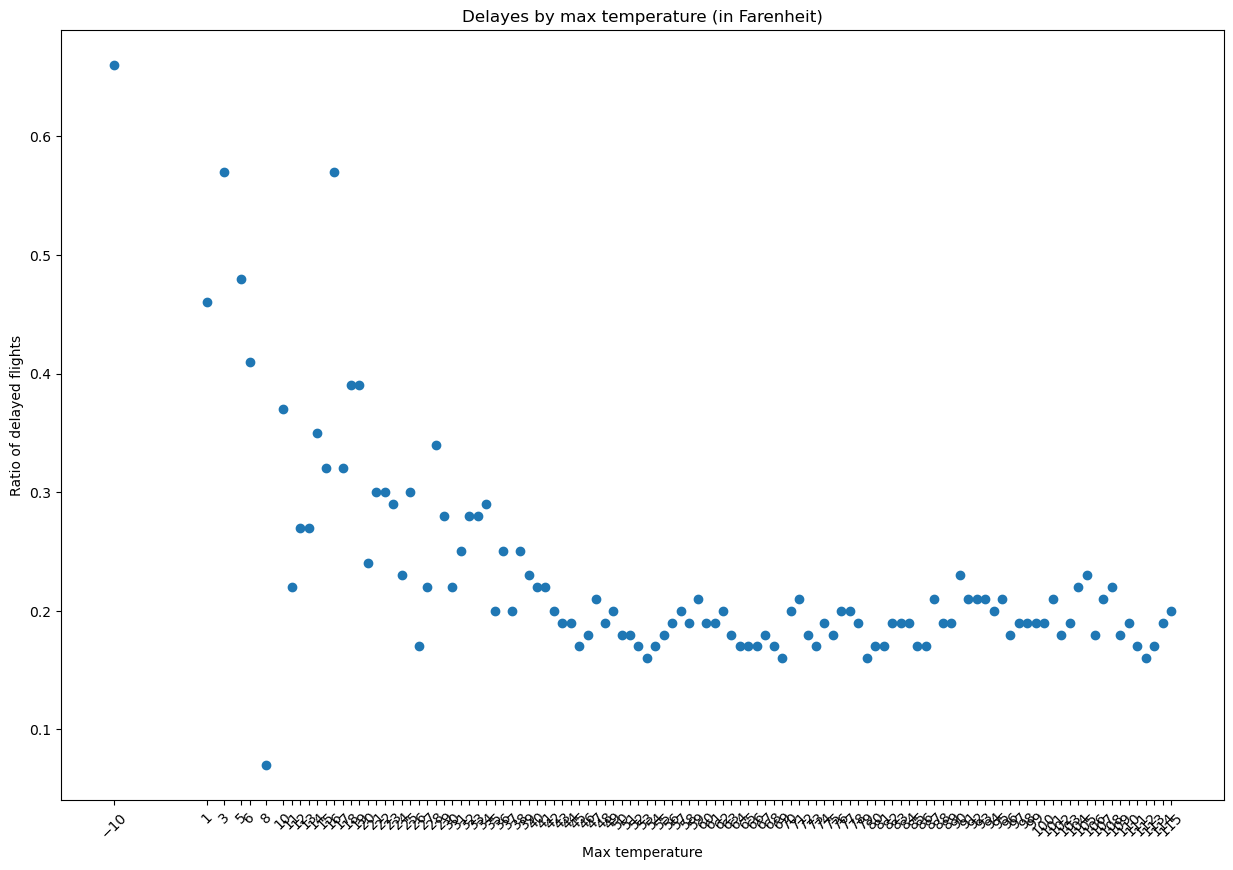

In [228]:
plt.figure(figsize = (15,10))

plt.scatter(flight_delays_by_tmax_df['tmax'], flight_delays_by_tmax_df['is_delayed'] )

plt.title('Delayes by max temperature (in Farenheit)')
plt.ylabel(ylabel='Ratio of delayed flights')
plt.xlabel(xlabel='Max temperature')
plt.xticks(flight_delays_by_tmax_df ['tmax'], rotation = 45)

plt.show()

> Wersja 2 : Grupowanie do binów

In [229]:
bins = range(int(flight_cleaned_df['tmax'].min()), int(flight_cleaned_df['tmax'].max()) + 5, 5)
bins

range(-10, 120, 5)

In [230]:
flight_cleaned_df['tmax_agg'] = pd.cut(flight_cleaned_df['tmax'], bins = bins)
flight_cleaned_df

C:\Users\urszu\AppData\Local\Temp\ipykernel_19148\2365385043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_cleaned_df['tmax_agg'] = pd.cut(flight_cleaned_df['tmax'], bins = bins)


,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,route,date,station,name,prcp,snow,snwd,tmax,awnd,tmax_agg
0,155238,1,29,2,MQ,N262NN,3566,10397,13930,1541,...,"Atlanta, GA -> Chicago, IL",2019-01-29,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.17,0.0,0.0,51.0,12.53,"(50, 55]"
1,155240,1,2,3,WN,N7710A,3709,10397,10721,1405,...,"Atlanta, GA -> Boston, MA",2019-01-02,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.57,0.0,0.0,59.0,4.92,"(55, 60]"
2,155241,1,2,3,WN,N767SW,4573,10397,10721,755,...,"Atlanta, GA -> Boston, MA",2019-01-02,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.57,0.0,0.0,59.0,4.92,"(55, 60]"
3,155242,1,2,3,WN,N203WN,5902,10397,10721,1745,...,"Atlanta, GA -> Boston, MA",2019-01-02,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.57,0.0,0.0,59.0,4.92,"(55, 60]"
4,155243,1,2,3,WN,N500WR,2499,10397,10821,1155,...,"Atlanta, GA -> Baltimore, MD",2019-01-02,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.57,0.0,0.0,59.0,4.92,"(55, 60]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057386,1537328,12,11,3,DL,N321DH,1826,13303,10397,1807,...,"Miami, FL -> Atlanta, GA",2019-12-11,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",0.47,NaN,NaN,85.0,6.71,"(80, 85]"
1057387,1537329,12,11,3,DL,N329NW,1982,13303,12953,1959,...,"Miami, FL -> New York, NY",2019-12-11,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",0.47,NaN,NaN,85.0,6.71,"(80, 85]"
1057388,1537330,12,11,3,DL,N331NW,1987,13303,10397,1125,...,"Miami, FL -> Atlanta, GA",2019-12-11,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",0.47,NaN,NaN,85.0,6.71,"(80, 85]"
1057389,1537331,12,11,3,DL,N309DN,2151,13303,12953,700,...,"Miami, FL -> New York, NY",2019-12-11,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",0.47,NaN,NaN,85.0,6.71,"(80, 85]"


In [231]:
flight_delayed_df = flight_cleaned_df.loc[flight_cleaned_df['is_delayed'] == True]
flight_delayed_df

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,route,date,station,name,prcp,snow,snwd,tmax,awnd,tmax_agg
1,155240,1,2,3,WN,N7710A,3709,10397,10721,1405,...,"Atlanta, GA -> Boston, MA",2019-01-02,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.57,0.0,0.0,59.0,4.92,"(55, 60]"
3,155242,1,2,3,WN,N203WN,5902,10397,10721,1745,...,"Atlanta, GA -> Boston, MA",2019-01-02,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.57,0.0,0.0,59.0,4.92,"(55, 60]"
6,155245,1,2,3,WN,N294WN,3801,10397,10821,2015,...,"Atlanta, GA -> Baltimore, MD",2019-01-02,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.57,0.0,0.0,59.0,4.92,"(55, 60]"
8,155247,1,2,3,WN,N7718B,4771,10397,10821,945,...,"Atlanta, GA -> Baltimore, MD",2019-01-02,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.57,0.0,0.0,59.0,4.92,"(55, 60]"
14,155253,1,2,3,WN,N740SW,6626,10397,11278,2200,...,"Atlanta, GA -> Washington, DC",2019-01-02,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.57,0.0,0.0,59.0,4.92,"(55, 60]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057380,1537322,12,11,3,DL,N343DN,1455,13303,12953,1458,...,"Miami, FL -> New York, NY",2019-12-11,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",0.47,NaN,NaN,85.0,6.71,"(80, 85]"
1057382,1537324,12,11,3,DL,N327DN,1469,13303,12953,1702,...,"Miami, FL -> New York, NY",2019-12-11,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",0.47,NaN,NaN,85.0,6.71,"(80, 85]"
1057385,1537327,12,11,3,DL,N363DN,1795,13303,10397,1500,...,"Miami, FL -> Atlanta, GA",2019-12-11,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",0.47,NaN,NaN,85.0,6.71,"(80, 85]"
1057387,1537329,12,11,3,DL,N329NW,1982,13303,12953,1959,...,"Miami, FL -> New York, NY",2019-12-11,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",0.47,NaN,NaN,85.0,6.71,"(80, 85]"


In [232]:
flight_delays_by_tmax_df = (flight_delayed_df.groupby('tmax_agg')['is_delayed'].count() / flight_cleaned_df.groupby('tmax_agg')['is_delayed'].count()).round(2).to_frame().reset_index()
flight_delays_by_tmax_df 

,tmax_agg,is_delayed
0,"(-10, -5]",NaN
1,"(-5, 0]",NaN
2,"(0, 5]",0.47
3,"(5, 10]",0.38
4,"(10, 15]",0.28
5,"(15, 20]",0.35
6,"(20, 25]",0.27
7,"(25, 30]",0.25
8,"(30, 35]",0.26
9,"(35, 40]",0.23


<Figure size 1500x1000 with 0 Axes>

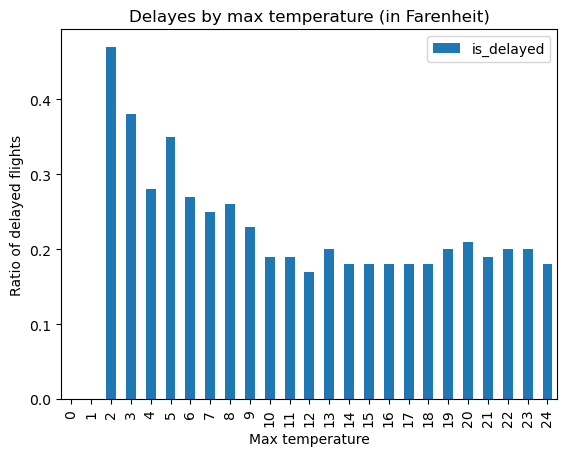

In [233]:
plt.figure(figsize = (15,10))

flight_delays_by_tmax_df.plot(kind='bar')

plt.title('Delayes by max temperature (in Farenheit)')
plt.ylabel(ylabel='Ratio of delayed flights')
plt.xlabel(xlabel='Max temperature')

plt.show()

## Miejsce na Twój komentarz

Temperatura ma znaczący wpływ na wskaźnik opóźnień, szczególnie w przypadku temperatur ujemnych lub bliskich 0 C. Do okolo 4 C (40 F) widać dużą korelację pomiędzy temperaturą a opóżnienieniem - im niższa temperatura, tym jest więcej opóżnionych lotów. Powyżej tej temperatury ta korelacja utrzymuje się na podobnym poziomie. 

# Podsumowanie
W tej części warsztatu dokonaliśmy kompleksowej analizy posiadanego zbioru danych. Eksploracja
pozwoliła nam na zapoznanie się z cechami charakterystycznymi lotów - wiemy już, które 
zmienne mogą mieć wpływ na opóźnienia lotów, a które nie. Co warto podkreślić, skupiliśmy się na wielu
aspektach tej analizy, co otwiera potencjalnie również inne możliwości dalszej pracy nad tą bazą.

W tym momencie przejdziemy do kolejnego kroku, w którym, na podstawie tej analizy, przygotujemy 
system raportowy. Zanim jednak stworzymy dashboard, potrzebujemy zaktualizować naszą bazę danych.

In [234]:
flight_df

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,destination_city_name,route,date,station,name,prcp,snow,snwd,tmax,awnd
0,155238,1,29,2,MQ,N262NN,3566,10397,13930,1541,...,"Chicago, IL","Atlanta, GA -> Chicago, IL",2019-01-29,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.17,0.0,0.0,51.0,12.53
1,155240,1,2,3,WN,N7710A,3709,10397,10721,1405,...,"Boston, MA","Atlanta, GA -> Boston, MA",2019-01-02,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.57,0.0,0.0,59.0,4.92
2,155241,1,2,3,WN,N767SW,4573,10397,10721,755,...,"Boston, MA","Atlanta, GA -> Boston, MA",2019-01-02,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.57,0.0,0.0,59.0,4.92
3,155242,1,2,3,WN,N203WN,5902,10397,10721,1745,...,"Boston, MA","Atlanta, GA -> Boston, MA",2019-01-02,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.57,0.0,0.0,59.0,4.92
4,155243,1,2,3,WN,N500WR,2499,10397,10821,1155,...,"Baltimore, MD","Atlanta, GA -> Baltimore, MD",2019-01-02,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.57,0.0,0.0,59.0,4.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057386,1537328,12,11,3,DL,N321DH,1826,13303,10397,1807,...,"Atlanta, GA","Miami, FL -> Atlanta, GA",2019-12-11,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",0.47,NaN,NaN,85.0,6.71
1057387,1537329,12,11,3,DL,N329NW,1982,13303,12953,1959,...,"New York, NY","Miami, FL -> New York, NY",2019-12-11,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",0.47,NaN,NaN,85.0,6.71
1057388,1537330,12,11,3,DL,N331NW,1987,13303,10397,1125,...,"Atlanta, GA","Miami, FL -> Atlanta, GA",2019-12-11,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",0.47,NaN,NaN,85.0,6.71
1057389,1537331,12,11,3,DL,N309DN,2151,13303,12953,700,...,"New York, NY","Miami, FL -> New York, NY",2019-12-11,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",0.47,NaN,NaN,85.0,6.71


In [235]:
flight_df.to_csv(r'C:\Users\urszu\OneDrive\Pulpit\CodersLab - cwiczenia\Projekt koncowy\data\processed\flight_df_03.csv', index=False)